In [3]:
# loading data
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)

#Normalizing data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

(404, 13)
(102, 13)


In [4]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [8]:
# K-fold validation
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
print(all_scores)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
[2.408432722091675, 2.8067386150360107, 2.5919857025146484, 2.6139495372772217]


In [11]:
# Changing number of epochs to 500
import numpy as np
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0, validation_data=(val_data, val_targets))
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print(average_mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
[4.761748671531677, 3.42993426322937, 3.1065526604652405, 2.7959773540496826, 2.811264395713806, 2.6711801290512085, 2.662774085998535, 2.59322327375412, 2.5803415775299072, 2.6924837231636047, 2.6548641324043274, 2.5361741185188293, 2.513167083263397, 2.5860010981559753, 2.5322980284690857, 2.4809582233428955, 2.4360254108905792, 2.423364818096161, 2.428031235933304, 2.443233370780945, 2.5665703415870667, 2.4551455676555634, 2.4990984201431274, 2.4078341126441956, 2.4602279663085938, 2.5730890035629272, 2.485024094581604, 2.4831676483154297, 2.469917356967926, 2.3791583776474, 2.460618317127228, 2.634464681148529, 2.4212024807929993, 2.5493568778038025, 2.4688947796821594, 2.438621312379837, 2.4914349615573883, 2.3349767327308655, 2.5071688890457153, 2.4754669070243835, 2.516549289226532, 2.4691579341888428, 2.4040821194648743, 2.4573360085487366, 2.531496226787567, 2.5588704347610474, 2.3750261068344116, 

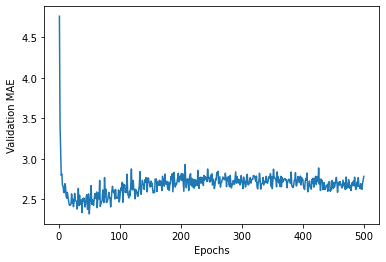

In [12]:
# Ploting validation score
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

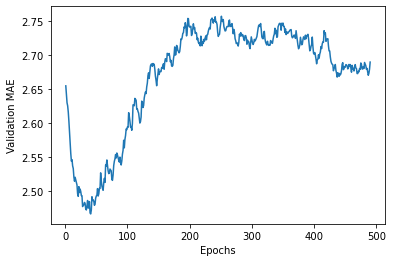

In [13]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()